In [3]:
import csv
from constants import SEED
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import cross_val_predict

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
albums = pd.read_csv('./embeddings/albums_embeddings_deepwalk_60_15.csv', index_col='id', quoting=csv.QUOTE_ALL)
albums.embedding = albums.embedding.apply(lambda embedding: eval(embedding))

# Visualization

In [5]:
pca = PCA(n_components=2, random_state=SEED)
principal_components = pca.fit_transform(np.array(albums.embedding.tolist()))

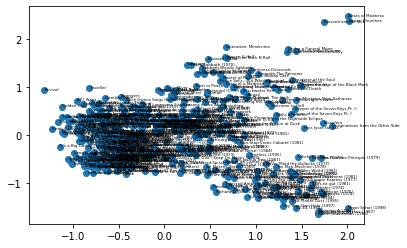

In [6]:
plt.scatter(principal_components[:, 0], principal_components[:, 1])

for index, row in albums.iterrows():
    plt.annotate(row.title, (principal_components[index, 0], principal_components[index, 1]), fontsize=4)

plt.show()

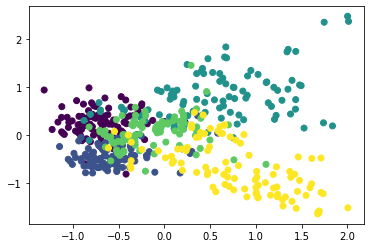

In [7]:
albums_labels = {label:index for index, label in enumerate(albums.label.unique())}
albums_colours = albums.label.map(albums_labels)

plt.scatter(principal_components[:, 0], principal_components[:, 1], c=albums_colours)
plt.show()

# Similarity

In [8]:
cos_similarity = cosine_similarity(np.array(albums.embedding.tolist()), np.array(albums.embedding.tolist()))

In [10]:
albums_index = 126
print(albums.iloc[albums_index].title)

closest_albums = cos_similarity[albums_index].argsort()[-6:][::-1]
for closest_album in closest_albums[1:]:
    print(albums.iloc[closest_album].title, cos_similarity[albums_index, closest_album])

Escape
How Ya Like Me Now 0.4189784598165289
1999 (1982) 0.3824517254436626
Purple Rain (1984) 0.3811061198496957
Midnight Maruaders 0.37726651791508603
Raising Hell 0.36331486156149384


# Classification

In [11]:
X = np.array(albums.embedding.tolist())
y = albums_colours.to_numpy()

logistic_classifier = LogisticRegression(multi_class='ovr', random_state=SEED)
predicted = cross_val_predict(logistic_classifier, X, y, cv=10)

In [12]:
print(classification_report(y, predicted, target_names=albums.label.unique()))

              precision    recall  f1-score   support

     country       0.90      0.90      0.90        93
         rap       0.93      0.94      0.94       100
       metal       0.93      0.93      0.93       100
        rock       0.81      0.80      0.81        86
  electronic       0.87      0.87      0.87        99

    accuracy                           0.89       478
   macro avg       0.89      0.89      0.89       478
weighted avg       0.89      0.89      0.89       478

